In [1]:
%cd ..

/home/dp/hdd/gits/autochat


In [2]:
from langchain_community.chat_models import ChatOpenAI
import pandas as pd
import json

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from ragchat.html_cleaner import HtmlCleaner
from ragchat.html_patterns import HtmlPatterns


In [5]:
cleaner = HtmlCleaner(parser="inscriptis", debug=True, max_pages=None)
clean_text_dict = cleaner.get_clean_text_dict()


In [6]:
l_lens = []
c_lens = []
for fname in list(clean_text_dict.keys()):
    cleaned = clean_text_dict[fname]["cleaned"]
    c_lens.append((len(cleaned), fname))
    l_lens.append((len(cleaned.splitlines()), fname))

c_lens.sort()
l_lens.sort()


In [7]:
llm = ChatOpenAI(model="gpt-3.5-turbo-1106", temperature=0)


/home/dp/hdd/gits/autochat/env/lib/python3.8/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The class `langchain_community.chat_models.openai.ChatOpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [8]:
title_groups = {}
N = len(c_lens)
for idx in range(N):
    pg = c_lens[idx][1]
    # text=clean_text_dict[pg]['cleaned']
    title = clean_text_dict[pg]["title"]
    if title not in title_groups:
        title_groups[title] = {"titles": [], "token_counts": []}
        title_groups[title]["n_titles"] = 0
        title_groups[title]["n_tokens"] = 0
    title_groups[title]["titles"].append(pg)
    title_groups[title]["n_titles"] += 1
    new_token_n = llm.get_num_tokens(clean_text_dict[pg]["cleaned"])
    title_groups[title]["token_counts"].append(new_token_n)
    title_groups[title]["n_tokens"] += new_token_n

title_n, n_title_sorted_titles = zip(
    *sorted([(info["n_titles"], title) for title, info in title_groups.items()])
)
n_tokens, n_tokens_sorted_titles = zip(
    *sorted([(info["n_tokens"], title) for title, info in title_groups.items()])
)

# result[pg]=llm.get_num_tokens(text)
# if idx>100:break


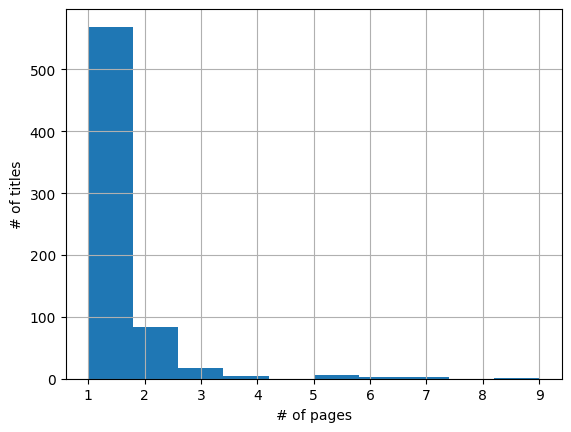

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pd.Series(title_n).hist(bins=10, ax=ax)
ax.set_xlabel("# of pages")
ax.set_ylabel("# of titles")
# ax.set_title('title-level')
# ax.set_title('pages per title')
fig.savefig('notebooks/images/' + 'pages per title'.replace(' ','_') + '.png')

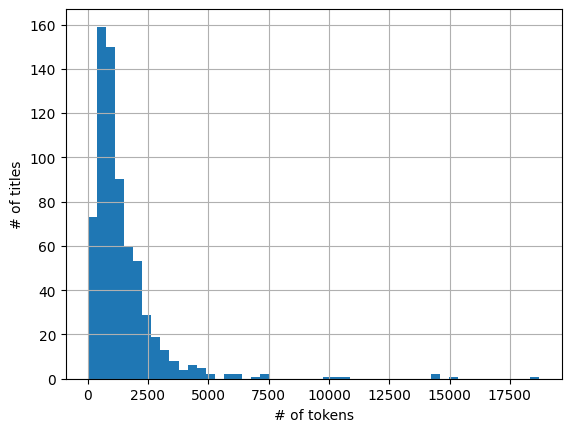

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
pd.Series(n_tokens).hist(bins=50, ax=ax)
ax.set_xlabel("# of tokens")
ax.set_ylabel("# of titles")
# ax.set_title('title-level')
# ax.set_title('tokens per title')
fig.savefig('notebooks/images/' + 'tokens per title'.replace(' ','_') + '.png')

In [11]:
n_title_sorted_titles[-10:]


('Contact Customer Support',
 'Genuine Autodesk',
 'Home',
 'Product Design & Manufacturing (PDMC) Collection',
 'Autodesk Account Basics',
 'Customer Help',
 'Autodesk Administrators',
 'Autodesk Education',
 'Fusion 360',
 'Buy Autodesk Software')

In [12]:
[*zip(n_tokens_sorted_titles[-10:], n_tokens[-10:])]


[('Home', 7092),
 ('Product Design & Manufacturing (PDMC) Collection', 7130),
 ('Security Advisories', 7188),
 ('Autodesk Account Basics', 9999),
 ('Autodesk Administrators', 10358),
 ('Autodesk Flex', 10756),
 ('Customer Help', 14352),
 ('Architecture, Engineering and Construction (AEC) Collection 2024', 14600),
 ('Fusion 360', 15136),
 ('Buy Autodesk Software', 18720)]

In [13]:
t_sorted_idx = -1
title = n_title_sorted_titles[-1]
result = []
for pg in title_groups[title]["titles"]:
    result.append(clean_text_dict[pg]["cleaned"])
"---------------------------------------------------------------\n".join(result)


'Get your free access now!\n\n          You are eligible for free access on the educational products page.\n\n        Get educational products\n         Get educational products\n\n          Autodesk products\n\n         Chat with sales\n\n         Filters\n\n        (Show) (Hide)\n         0 results\n\n          Sort By\n\n           Featured\n           A - Z\n         Filters\n          0 results\n         Architecture, Engineering & Construction\n          Architecture\n          Structural design\n          MEP design\n          Construction\n          Infrastructure\n         Product Design & Manufacturing\n          Product design & engineering\n          Simulation & analysis\n          Manufacturing & production\n         Media & Entertainment\n          Film & VFX\n          Gaming & VR\n         Workflows\n          3D modeling\n          Additive manufacturing\n          Additive manufacturing optimization\n          Administration\n          Animation\n          Bid develo

In [14]:
for title,group_dict in title_group.items():
    

SyntaxError: unexpected EOF while parsing (394656012.py, line 2)

In [ ]:
pd.Series(title_n).hist()
